# Data Access with Zipline

Zipline is the algorithmic trading library that used to power the now-defunct Quantopian backtesting and live-trading platform. It is also available offline to develop a strategy using a limited number of free data bundles that can be ingested and used to test the performance of trading ideas.

## Zipline installation

## Imports & Settings

In [1]:
%matplotlib inline
import pandas as pd

In [2]:
%load_ext zipline

In [3]:
from zipline.api import *
import logbook
log = logbook.Logger('algo')

## Zipline Ingest Data

##### 2021-09-18 11:54:16 

## Data

### Portfolio and Benchmark

In [4]:
import numpy as np
import pandas as pd
from trading_calendars import get_calendar

### Ingest Data

In [5]:
!zipline bundles

alpaca_api 2021-10-22 20:21:54.048365
alpaca_csv <no ingestions>
csvdir 2021-10-22 20:16:58.509372
quandl 2021-09-12 09:12:19.965686
quantopian-quandl 2021-02-12 09:36:13.693885
yahoo_direct 2021-10-21 19:08:32.216928


In [ ]:
#!zipline clean -b yahoo_direct --keep-last 1

[2021-10-30 15:22:32.275118] INFO: zipline.data.bundles.core: Cleaning 2021-10-15T07;18;23.673888.


In [8]:
!YAHOO_SYM_LST=SPY,MSFT,GOOGL,BLK,AMD,AAPL,TSLA,MTCH zipline ingest -b yahoo_direct

[2021-10-30 15:23:36.098934] INFO: zipline.data.bundles.core: Ingesting yahoo_direct.
[2021-10-30 15:23:36.099058] INFO: zipline.data.bundles.ingester: symbols are: ('AAPL', 'MTCH', 'BLK', 'MSFT', 'GOOGL', 'AMD', 'TSLA', 'SPY')
[2021-10-30 15:23:36.100382] INFO: zipline.data.bundles.ingester: writing data...
2010-01-04  7.622500  7.660714  7.585000  7.643214  493729600         0      1
2010-01-05  7.664286  7.699643  7.616071  7.656429  601904800         0      1
2010-01-06  7.656429  7.686786  7.526786  7.534643  552160000         0      1
2010-01-04  5.890919  5.962307  5.839520  5.856653  5840636         0      1
2010-01-05  5.865220  5.996573  5.836665  5.985151  7711404         0      1
2010-01-06  5.976585  6.007995  5.925186  5.936608  5409539         0      1
2010-01-04  236.050003  239.600006  233.520004  ...  238700         0      1
2010-01-05  239.050003  239.669998  236.759995  ...  198800         0      1
2010-01-06  238.509995  238.649994  234.059998  ...  278500         

### Data access using zipline

The following code illustrates how zipline permits us to access daily stock data for a range of companies. You can run zipline scripts in the Jupyter Notebook using the magic function of the same name.

First, you need to initialize the context with the desired security symbols. We'll also use a counter variable. Then zipline calls handle_data, where we use the `data.history()` method to look back a single period and append the data for the last day to a .csv file:

In [9]:
%%zipline --start 2010-10-1 --end 2021-10-1 --data-frequency daily --benchmark-symbol SPY --bundle yahoo_direct
from zipline.api import order_target, record, symbol
import pandas as pd


def initialize(context):
    context.i = 0
    context.assets = [symbol('BLK'), symbol('TSLA'), symbol('MTCH'), symbol('MSFT'),symbol('GOOGL'), symbol('AAPL'), symbol('AMD'),]
    
def handle_data(context, data):
    df = data.history(context.assets, fields=['price', 'volume'], bar_count=1, frequency="1d")
    df = df.reset_index()
    
    if context.i == 0:
        df.columns = ['date', 'asset', 'price', 'volume']
        df.to_csv('zipline/portfolio_data.csv', index=False)
    else:
        df.to_csv('zipline/portfolio_data.csv', index=False, mode='a', header=None)
    context.i += 1

/Users/mw/opt/anaconda3/lib/python3.8/site-packages/empyrical/stats.py:706: RuntimeWarning: invalid value encountered in true_divide
  np.divide(
/Users/mw/opt/anaconda3/lib/python3.8/site-packages/empyrical/stats.py:797: RuntimeWarning: invalid value encountered in true_divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)


,period_open,period_close,long_value,short_value,long_exposure,pnl,short_exposure,capital_used,orders,transactions,...,beta,sharpe,sortino,max_drawdown,max_leverage,excess_return,treasury_period_return,trading_days,period_label,algorithm_period_return
2010-10-01 20:00:00+00:00,2010-10-01 13:31:00+00:00,2010-10-01 20:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,[],[],...,NaN,None,None,0.0,0.0,0.0,0.0,1,2010-10,0.0
2010-10-04 20:00:00+00:00,2010-10-04 13:31:00+00:00,2010-10-04 20:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,[],[],...,0.0,None,None,0.0,0.0,0.0,0.0,2,2010-10,0.0
2010-10-05 20:00:00+00:00,2010-10-05 13:31:00+00:00,2010-10-05 20:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,[],[],...,0.0,None,None,0.0,0.0,0.0,0.0,3,2010-10,0.0
2010-10-06 20:00:00+00:00,2010-10-06 13:31:00+00:00,2010-10-06 20:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,[],[],...,0.0,None,None,0.0,0.0,0.0,0.0,4,2010-10,0.0
2010-10-07 20:00:00+00:00,2010-10-07 13:31:00+00:00,2010-10-07 20:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,[],[],...,0.0,None,None,0.0,0.0,0.0,0.0,5,2010-10,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-27 20:00:00+00:00,2021-09-27 13:31:00+00:00,2021-09-27 20:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,[],[],...,0.0,None,None,0.0,0.0,0.0,0.0,2766,2021-09,0.0
2021-09-28 20:00:00+00:00,2021-09-28 13:31:00+00:00,2021-09-28 20:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,[],[],...,0.0,None,None,0.0,0.0,0.0,0.0,2767,2021-09,0.0
2021-09-29 20:00:00+00:00,2021-09-29 13:31:00+00:00,2021-09-29 20:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,[],[],...,0.0,None,None,0.0,0.0,0.0,0.0,2768,2021-09,0.0
2021-09-30 20:00:00+00:00,2021-09-30 13:31:00+00:00,2021-09-30 20:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,[],[],...,0.0,None,None,0.0,0.0,0.0,0.0,2769,2021-09,0.0


We can plot the data as follows:

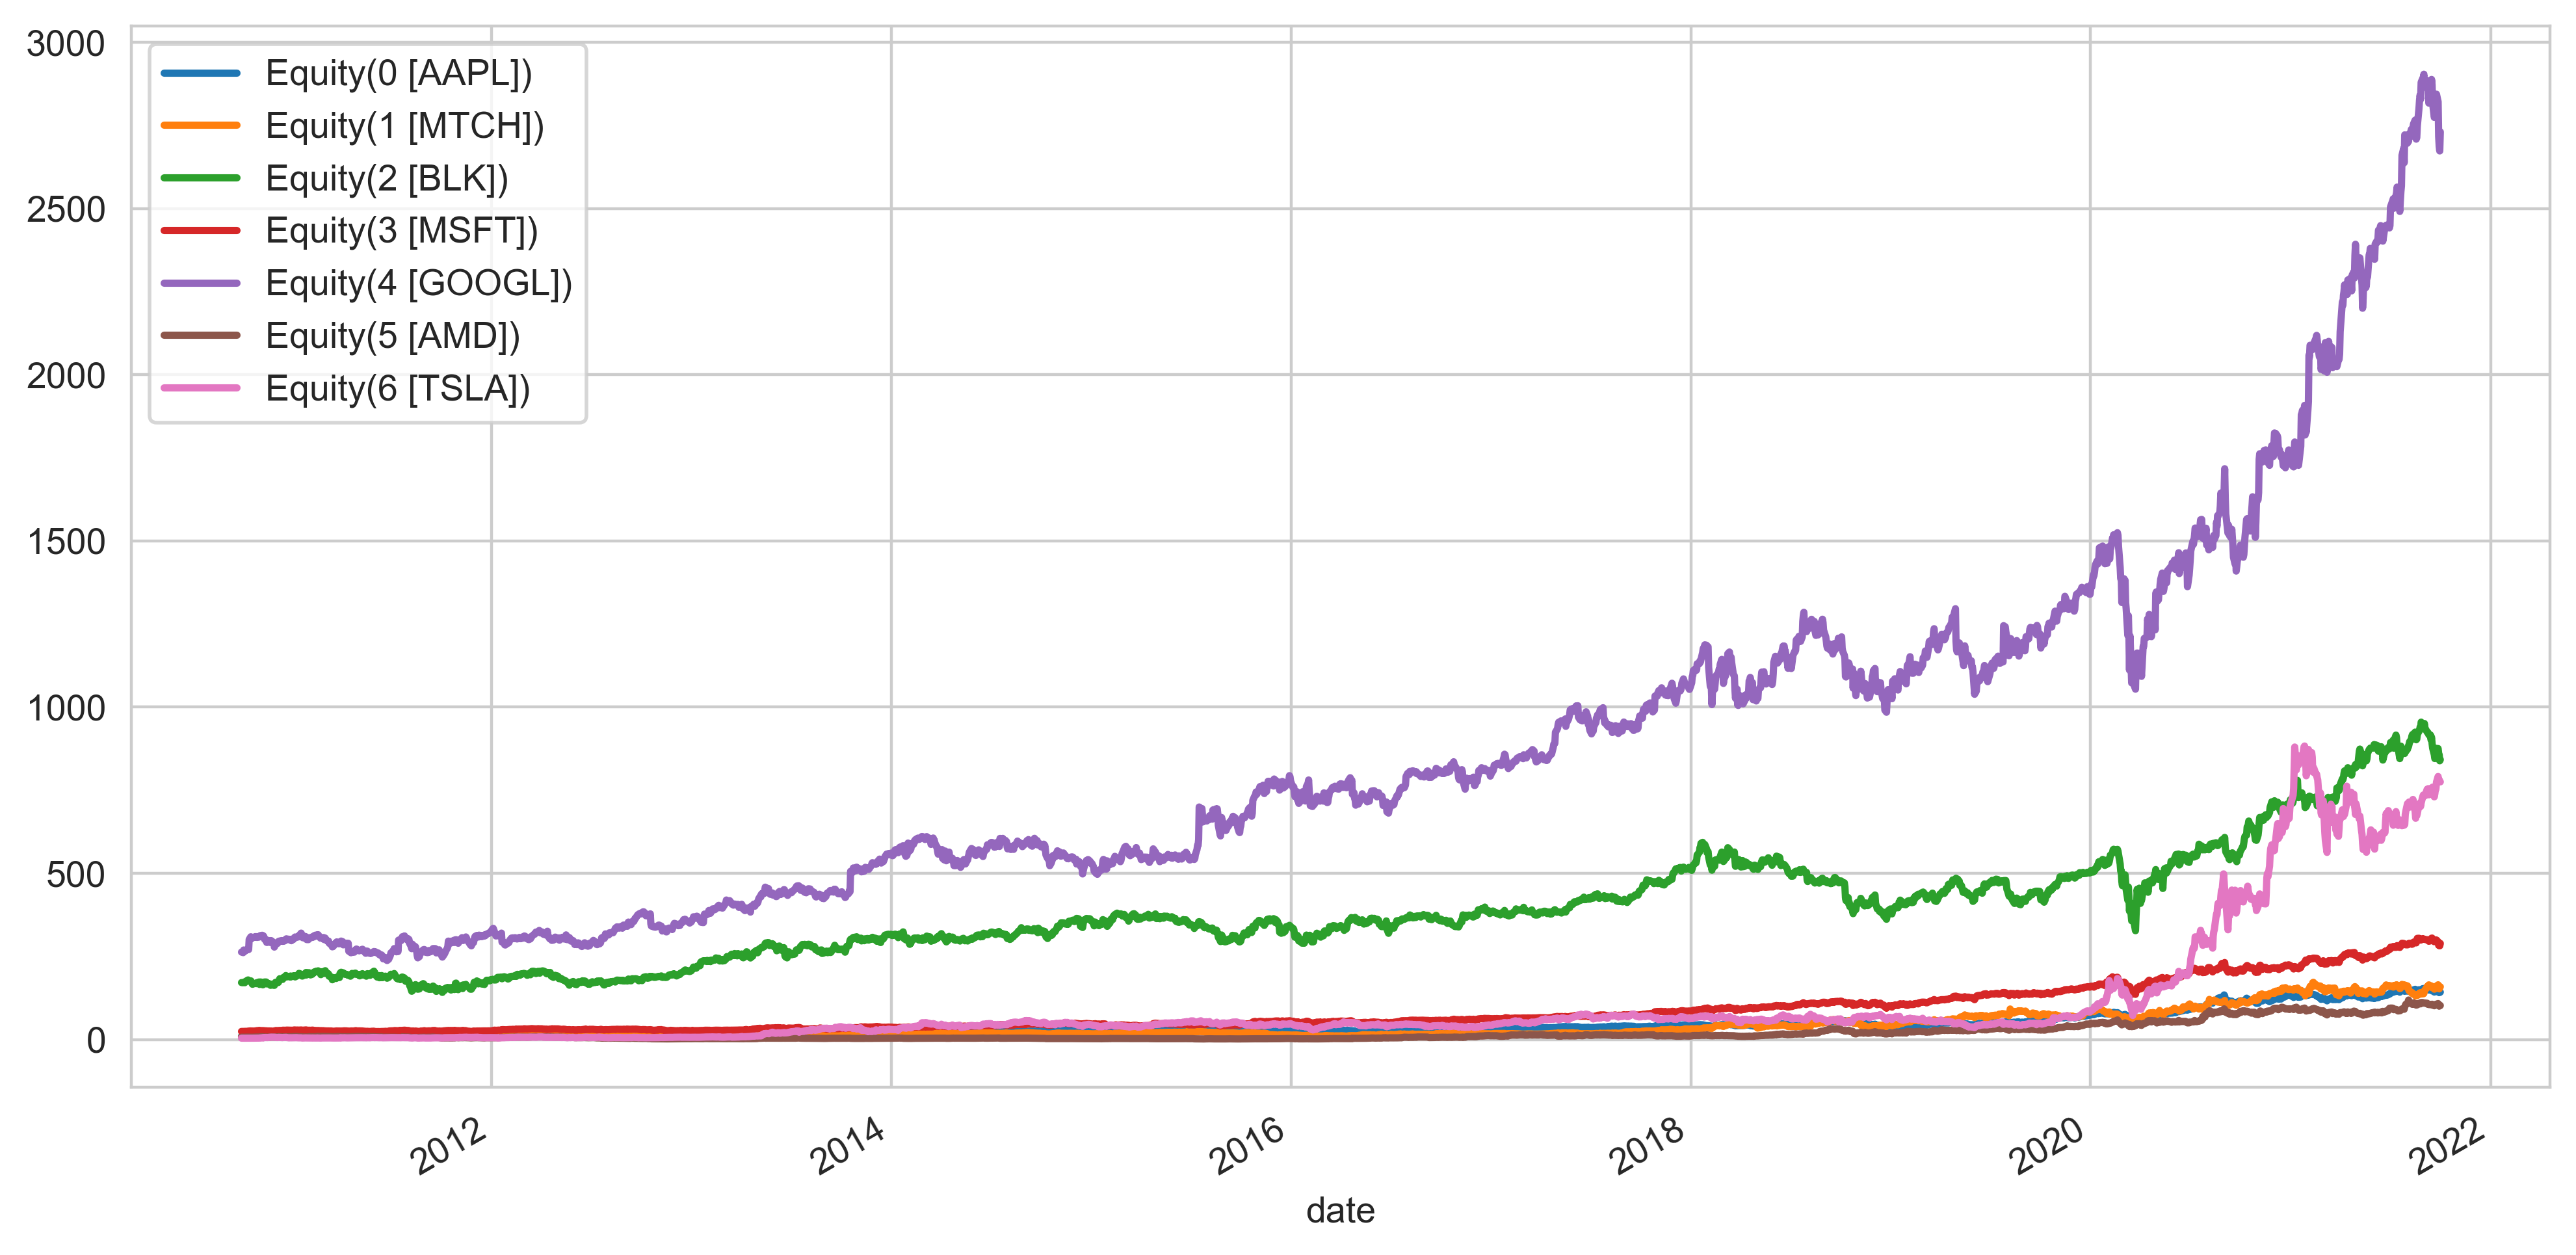

In [10]:
import seaborn as sns
import matplotlib.pylab as plt
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 200
%config InlineBackend.figure_format = 'retina'

df = pd.read_csv('zipline/portfolio_data.csv')
df.date = pd.to_datetime(df.date)
df.set_index('date').groupby('asset').price.plot(lw=2, legend=True, figsize=(12, 6))
plt.savefig(('zipline_data'), dpi=300);